## CalCOFI
### Over 60 years of oceanographic data

#### Context
The CalCOFI data set represents the longest (1949-present) and most complete (more than 50,000 sampling stations) time series of oceanographic and larval fish data in the world. It includes abundance data on the larvae of over 250 species of fish; larval length frequency data and egg abundance data on key commercial species; and oceanographic and plankton data. The physical, chemical, and biological data collected at regular time and space intervals quickly became valuable for documenting climatic cycles in the California Current and a range of biological responses to them. CalCOFI research drew world attention to the biological response to the dramatic Pacific-warming event in 1957-58 and introduced the term “El Niño” into the scientific literature.

The California Cooperative Oceanic Fisheries Investigations (CalCOFI) are a unique partnership of the California Department of Fish & Wildlife, NOAA Fisheries Service and Scripps Institution of Oceanography. The organization was formed in 1949 to study the ecological aspects of the sardine population collapse off California. Today our focus has shifted to the study of the marine environment off the coast of California, the management of its living resources, and monitoring the indicators of El Nino and climate change. CalCOFI conducts quarterly cruises off southern & central California, collecting a suite of hydrographic and biological data on station and underway. Data collected at depths down to 500 m include: temperature, salinity, oxygen, phosphate, silicate, nitrate and nitrite, chlorophyll, transmissometer, PAR, C14 primary productivity, phytoplankton biodiversity, zooplankton biomass, and zooplankton biodiversity.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
data_set = pd.read_csv("D:\ML Python\MY_DATA\\bottle.csv")
data_set_2 = pd.read_csv("D:\ML Python\MY_DATA\\cast.csv")

C:\Users\vedaa\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (47,73) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\vedaa\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (40,41,44,45,46,47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## Data Wrangling

In [4]:
data_set.head(3)

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data_set_2.head(3)

,Cst_Cnt,Cruise_ID,Cruise,Cruz_Sta,DbSta_ID,Cast_ID,Sta_ID,Quarter,Sta_Code,Distance,...,Wave_Prd,Wind_Dir,Wind_Spd,Barometer,Dry_T,Wet_T,Wea,Cloud_Typ,Cloud_Amt,Visibility
0,1,1949-03-01-C-31CR,194903,19490305400560,5400560,19-4903CR-HY-060-0930-05400560,054.0 056.0,1,NST,NaN,...,NaN,23.0,18.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN
1,2,1949-03-01-C-31CR,194903,19490305200750,5200750,19-4903CR-HY-060-2112-05200750,052.0 075.0,1,NST,NaN,...,NaN,16.0,5.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN
2,3,1949-03-01-C-31CR,194903,19490305100850,5100850,19-4903CR-HY-061-0354-05100850,051.0 085.0,1,NST,NaN,...,NaN,23.0,5.0,NaN,NaN,NaN,6.0,NaN,NaN,NaN


In [6]:
data_set.describe(include = 'all')

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
count,864863.000000,864863.000000,864863,864863,864863.000000,853900.000000,817509.000000,696201.000000,812174.000000,661274.000000,...,225275.000000,864863.000000,122006.000000,1999.000000,224.000000,2084.000000,234.000000,10.000000,84.000000,55
unique,NaN,NaN,2634,864850,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37
top,NaN,NaN,090.0 045.0,20-16045S-MX-110-1421-06670900-0003A-3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CTD Bottle Misfire; DIC sample compromised. C...
freq,NaN,NaN,10043,2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
mean,17138.790958,432432.000000,NaN,NaN,226.831951,10.799677,33.840350,3.392468,25.819394,57.103779,...,0.198599,228.395694,162.071521,2153.239714,2168.148330,2256.055845,2278.858803,7.948570,7.910983,NaN
std,10240.949817,249664.587267,NaN,NaN,316.050259,4.243825,0.461843,2.073256,1.167787,37.094137,...,0.376539,319.456731,85.722796,112.995202,154.852332,34.844435,58.496495,0.021216,0.077666,NaN
min,1.000000,1.000000,NaN,NaN,0.000000,1.440000,28.431000,-0.010000,20.934000,-0.100000,...,-3.890000,0.000000,0.000000,1948.850000,1969.440000,2181.570000,2198.150000,7.923100,7.618300,NaN
25%,8269.000000,216216.500000,NaN,NaN,46.000000,7.680000,33.488000,1.360000,24.965000,21.100000,...,0.050000,46.000000,200.000000,2028.330000,2008.977500,2230.322500,2229.062500,7.931475,7.898675,NaN
50%,16848.000000,432432.000000,NaN,NaN,125.000000,10.060000,33.863000,3.440000,25.996000,54.400000,...,0.110000,126.000000,206.000000,2170.640000,2265.885000,2244.325000,2247.505000,7.946650,7.928850,NaN
75%,26557.000000,648647.500000,NaN,NaN,300.000000,13.880000,34.196900,5.500000,26.646000,97.600000,...,0.230000,302.000000,214.000000,2253.810000,2315.525000,2278.505000,2316.452500,7.963300,7.955100,NaN


In [7]:
data_set_2.describe(include = 'all')

,Cst_Cnt,Cruise_ID,Cruise,Cruz_Sta,DbSta_ID,Cast_ID,Sta_ID,Quarter,Sta_Code,Distance,...,Wave_Prd,Wind_Dir,Wind_Spd,Barometer,Dry_T,Wet_T,Wea,Cloud_Typ,Cloud_Amt,Visibility
count,34404.000000,34404,34404.000000,3.440400e+04,3.440400e+04,34404,34404,34404.000000,34404,19714.000000,...,11634.000000,32928.000000,32725.000000,19063.000000,19071.000000,18989.000000,26807.000000,9920.000000,11882.000000,9507.000000
unique,NaN,645,NaN,NaN,NaN,34404,2634,NaN,7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,1988-08-29-C-32NM,NaN,NaN,NaN,19-9908NM-MX-234-0405-07671000,090.0 045.0,NaN,ST,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,433,NaN,NaN,NaN,1,347,NaN,15117,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,17202.500000,NaN,197406.030781,1.974061e+13,9.330342e+06,NaN,NaN,2.366556,NaN,-116.135017,...,6.440863,27.067602,11.135951,1016.243702,16.261989,14.414635,1.324729,5.636895,4.995624,6.803092
std,9931.723667,NaN,1974.562207,1.974557e+11,2.217993e+06,NaN,NaN,1.091894,NaN,117.282768,...,2.295422,9.456406,6.823464,8.818816,2.728030,2.630224,1.162603,2.173354,3.106067,1.534078
min,1.000000,NaN,194903.000000,1.949030e+13,1.016800e+05,NaN,NaN,1.000000,NaN,-1920.150000,...,0.000000,0.000000,0.000000,101.400000,1.700000,1.800000,0.000000,0.000000,0.000000,0.000000
25%,8601.750000,NaN,195701.000000,1.957011e+13,8.100430e+06,NaN,NaN,1.000000,NaN,-169.801500,...,5.000000,26.000000,6.000000,1013.700000,14.400000,12.600000,1.000000,6.000000,2.000000,6.000000
50%,17202.500000,NaN,196912.000000,1.969121e+13,9.000800e+06,NaN,NaN,2.000000,NaN,-83.570000,...,6.000000,31.000000,10.000000,1016.300000,16.100000,14.200000,1.000000,6.000000,6.000000,7.000000
75%,25803.250000,NaN,198809.000000,1.988091e+13,1.067032e+07,NaN,NaN,3.000000,NaN,-29.470000,...,8.000000,33.000000,15.000000,1019.100000,17.900000,16.000000,2.000000,7.000000,8.000000,8.000000


In [8]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 74 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Cst_Cnt              864863 non-null  int64  
 1   Btl_Cnt              864863 non-null  int64  
 2   Sta_ID               864863 non-null  object 
 3   Depth_ID             864863 non-null  object 
 4   Depthm               864863 non-null  int64  
 5   T_degC               853900 non-null  float64
 6   Salnty               817509 non-null  float64
 7   O2ml_L               696201 non-null  float64
 8   STheta               812174 non-null  float64
 9   O2Sat                661274 non-null  float64
 10  Oxy_µmol/Kg          661268 non-null  float64
 11  BtlNum               118667 non-null  float64
 12  RecInd               864863 non-null  int64  
 13  T_prec               853900 non-null  float64
 14  T_qual               23127 non-null   float64
 15  S_prec           

In [9]:
data_set_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34404 entries, 0 to 34403
Data columns (total 61 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Cst_Cnt      34404 non-null  int64  
 1   Cruise_ID    34404 non-null  object 
 2   Cruise       34404 non-null  int64  
 3   Cruz_Sta     34404 non-null  int64  
 4   DbSta_ID     34404 non-null  int64  
 5   Cast_ID      34404 non-null  object 
 6   Sta_ID       34404 non-null  object 
 7   Quarter      34404 non-null  int64  
 8   Sta_Code     34404 non-null  object 
 9   Distance     19714 non-null  float64
 10  Date         34404 non-null  object 
 11  Year         34404 non-null  int64  
 12  Month        34404 non-null  int64  
 13  Julian_Date  34404 non-null  int64  
 14  Julian_Day   34404 non-null  int64  
 15  Time         34080 non-null  object 
 16  Lat_Dec      34404 non-null  float64
 17  Lat_Deg      34404 non-null  int64  
 18  Lat_Min      34404 non-null  float64
 19  Lat_

In [10]:
data = data_set[['Depthm', 'Salnty', 'T_degC']]

In [11]:
data

,Depthm,Salnty,T_degC
0,0,33.4400,10.500
1,8,33.4400,10.460
2,10,33.4370,10.460
3,19,33.4200,10.450
4,20,33.4210,10.450
...,...,...,...
864858,0,33.4083,18.744
864859,2,33.4083,18.744
864860,5,33.4150,18.692
864861,10,33.4062,18.161


In [12]:
data.isnull().sum()

Depthm        0
Salnty    47354
T_degC    10963
dtype: int64

In [13]:
from sklearn.impute import SimpleImputer
si = SimpleImputer()
data = pd.DataFrame(si.fit_transform(data),columns = ['Depthm', 'Salnty', 'T_degC'])

In [14]:
data.isnull().sum()

Depthm    0
Salnty    0
T_degC    0
dtype: int64

### We won't be considering the second dataset (cast.csv) as our aim is to predict the predict the temperature of the water, all these details are available in bottle.csv.

## Visualizing the Data (Exploratory Data Analysis)

<Figure size 864x432 with 0 Axes>

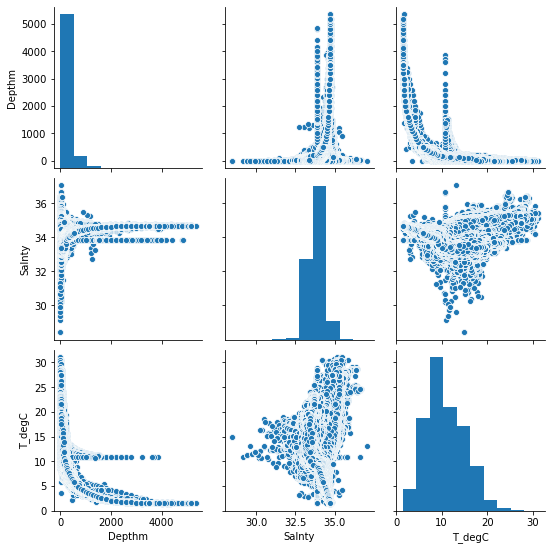

In [15]:
plt.figure(figsize = (12, 6))
sns.pairplot(data)
plt.show()

### From the above plots we can conclude that:
#### 1. As Depth increases Temprature decreases (Depth vs Temprature)
#### 2. The Salinity remains constant at around 35.0 even though the depth increases (Salinity vs Depth as well as Depth vs Salinity)

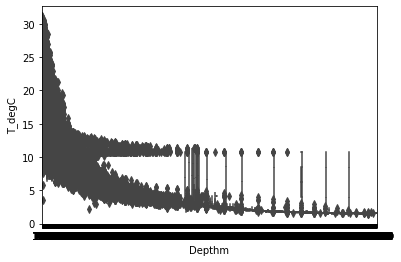

In [16]:
sns.boxplot(x = 'Depthm', y = 'T_degC', data = data)
plt.show()

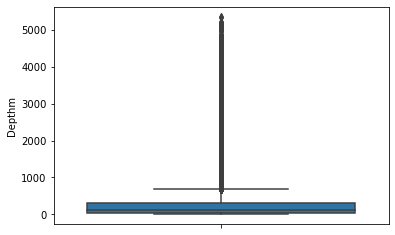

In [17]:
sns.boxplot(y = 'Depthm', data = data)

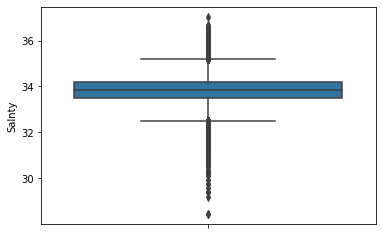

In [18]:
sns.boxplot(y = 'Salnty', data = data)

## Data Preprocessing

In [19]:
X = data.iloc[:, :-1].values
y = data.iloc[:, 2].values

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

## Applying various Regression Models

### Simple Linear Regression (Multivariate)

In [21]:
from sklearn.linear_model import LinearRegression
regressor_lin = LinearRegression()
regressor_lin.fit(X_train, y_train)

y_pred = regressor_lin.predict(X_test)

from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
print("R2-score: {}%".format(score * 100))

from sklearn.metrics import mean_absolute_error
mean = mean_absolute_error(y_test, y_pred)
print("Mean absolute error: {}".format(mean))

from sklearn.metrics import mean_squared_error
meansq = mean_squared_error(y_test, y_pred)
print("Residual sum of squares (MSE): {}\n".format(meansq))

import statsmodels.api as sms
X = np.append(arr = np.ones((864863, 1)).astype(int), values = X, axis = 1)
X_opt = X[:, [0, 1, 2]]
X_opt = np.array(X_opt, dtype = float)
regressor_OLS = sms.OLS(y, X_opt).fit()
print(regressor_OLS.summary())

R2-score: 48.1784289858757%
Mean absolute error: 2.2774703295446987
Residual sum of squares (MSE): 9.20355107556834

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.481
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                 4.014e+05
Date:                Tue, 22 Dec 2020   Prob (F-statistic):               0.00
Time:                        01:12:59   Log-Likelihood:            -2.1879e+06
No. Observations:              864863   AIC:                         4.376e+06
Df Residuals:                  864860   BIC:                         4.376e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------

### Polynomial Regression

In [22]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train)

y_pred_poly = lin_reg_2.predict(poly_reg.fit_transform(X_test))

from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred_poly)
print("R2-score: {}%".format(score * 100))

from sklearn.metrics import mean_absolute_error
mean = mean_absolute_error(y_test, y_pred_poly)
print("Mean absolute error: {}".format(mean))

from sklearn.metrics import mean_squared_error
meansq = mean_squared_error(y_test, y_pred_poly)
print("Residual sum of squares (MSE): {}\n".format(meansq))

R2-score: 77.62912469653352%
Mean absolute error: 1.4597141335331607
Residual sum of squares (MSE): 3.9730847489071115



### Support Vector Regression

In [23]:
'''X = data.iloc[:, :-1].values
y = data.iloc[:, 2].values
y = np.reshape(y,(864863,1))

from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X = sc_x.fit_transform(X)
y = sc_y.fit_transform(y)

from sklearn.svm import SVR
regressor_svr = SVR(kernel = 'rbf')
regressor_svr.fit(X, y)

y_pred_svr = sc.inverse_transform(regressor_svr.predict(sc.transform(X_test)))

from sklearn.metrics import r2_score
score = r2_score(y, y_pred_svr)
print("R2-score: {}%".format(score * 100))

from sklearn.metrics import mean_absolute_error
mean = mean_absolute_error(y, y_pred_svr)
print("Mean absolute error: {}".format(mean))

from sklearn.metrics import mean_squared_error
meansq = mean_squared_error(y_test, y_pred_svr)
print("Residual sum of squares (MSE): {}\n".format(meansq))'''

'X = data.iloc[:, :-1].values\ny = data.iloc[:, 2].values\ny = np.reshape(y,(864863,1))\n\nfrom sklearn.preprocessing import StandardScaler\nsc_x = StandardScaler()\nsc_y = StandardScaler()\nX = sc_x.fit_transform(X)\ny = sc_y.fit_transform(y)\n\nfrom sklearn.svm import SVR\nregressor_svr = SVR(kernel = \'rbf\')\nregressor_svr.fit(X, y)\n\ny_pred_svr = sc.inverse_transform(regressor_svr.predict(sc.transform(X_test)))\n\nfrom sklearn.metrics import r2_score\nscore = r2_score(y, y_pred_svr)\nprint("R2-score: {}%".format(score * 100))\n\nfrom sklearn.metrics import mean_absolute_error\nmean = mean_absolute_error(y, y_pred_svr)\nprint("Mean absolute error: {}".format(mean))\n\nfrom sklearn.metrics import mean_squared_error\nmeansq = mean_squared_error(y_test, y_pred_svr)\nprint("Residual sum of squares (MSE): {}\n".format(meansq))'

In [24]:
X = data.iloc[:, :-1].values
y = data.iloc[:, 2].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

### Decison Tree Regression

In [25]:
from sklearn.tree import DecisionTreeRegressor
regressor_dt = DecisionTreeRegressor(random_state = 0)
regressor_dt.fit(X_train, y_train)

y_pred_dt = regressor_dt.predict(X_test)

from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred_dt)
print("R2-score: {}%".format(score * 100))

from sklearn.metrics import mean_absolute_error
mean = mean_absolute_error(y_test, y_pred_dt)
print("Mean absolute error: {}".format(mean))

from sklearn.metrics import mean_squared_error
meansq = mean_squared_error(y_test, y_pred_dt)
print("Residual sum of squares (MSE): {}\n".format(meansq))

R2-score: 79.87523851553706%
Mean absolute error: 1.234267020292119
Residual sum of squares (MSE): 3.574173198172677



### Random Forest

In [29]:
from sklearn.ensemble import RandomForestRegressor
regressor_rf = RandomForestRegressor(n_estimators = 50, random_state = 0)
regressor_rf.fit(X_train, y_train)

y_pred_rf = regressor_rf.predict(X_test)

from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred_rf)
print("R2-score: {}%".format(score * 100))

from sklearn.metrics import mean_absolute_error
mean = mean_absolute_error(y_test, y_pred_rf)
print("Mean absolute error: {}".format(mean))

from sklearn.metrics import mean_squared_error
meansq = mean_squared_error(y_test, y_pred_rf)
print("Residual sum of squares (MSE): {}\n".format(meansq))

R2-score: 82.04503428415191%
Mean absolute error: 1.1792742092833697
Residual sum of squares (MSE): 3.18881579218906

